In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax') 
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.save('trained_model.keras')


/opt/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,938,312 (15.02 MB)

 Trainable params: 3,938,312 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

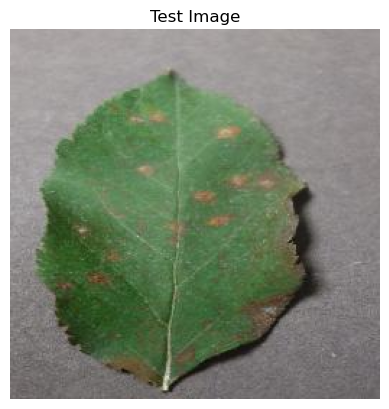

In [4]:
import cv2
image_path = "test/test/Apple_ceder_apple_rust.JPG"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])

plt.yticks([])
plt.axis('off')  
plt.show()


## Testing Model

In [5]:
import tensorflow as tf
image = tf.keras.preprocessing.image.load_img(image_path,target_size = (128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert Single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add (Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Assuming 8 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
prediction = model.predict(input_arr)
prediction,prediction.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


(array([[1.8049905e-17, 9.9999928e-01, 0.0000000e+00, 8.0295901e-29,
         0.0000000e+00, 9.1066848e-33, 4.1884557e-19, 6.9858942e-07]],
       dtype=float32),
 (1, 8))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


input_dim = 32  


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(8, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
result_index = np.argmax(prediction)
result_index                         

1

In [10]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
class_names = [
    'apple_black_rot',
    'Apple_ceder_apple_rust',
    'apple_healthy',
    'Apple_scab',
    'background_without_leaves',
    'grape_black_rot',
    'Grape_esca',
    'grape_healthy',
    'grape_leaf_blight'
]


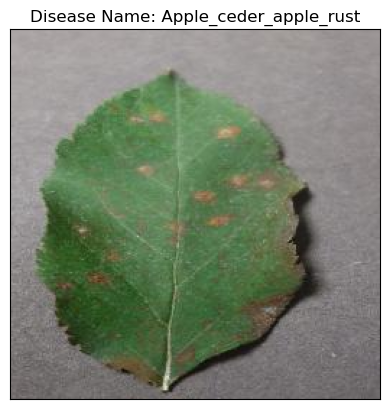

In [12]:

model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:

model_prediction

'Apple_ceder_apple_rust'